In [94]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
color_ = '#3eb489'
palette = ['#7e002f', '#dbf47c']

In [9]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

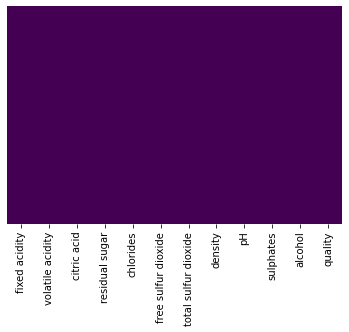

In [11]:
#checking the distribution of null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [12]:
sum(df.duplicated())

937

In [13]:
#Drop all the duplicates

df.drop_duplicates(inplace=True)

In [15]:
#check if there still any duplicates
sum(df.duplicated())

0

In [31]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.019214     0.298959   
volatile acidity          -0.019214          1.000000    -0.163228   
citric acid                0.298959         -0.163228     1.000000   
residual sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free sulfur dioxide       -0.058396         -0.102471     0.091681   
total sulfur dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
quality                   -0.124636         -0.190678     0.007065   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.083620   0.024036            -0.058396   
volatile acidity            0.098340   0.086287            -0.102471   
citric acid                 0.106269   0.132590             0.091681   
residual sugar              1.000000   0.076091             0.306835   
chlorides                   0.076091   1.000000             0.101272   
free sulfur dioxide         0.306835   0.101272             1.000000   
total sulfur dioxide        0.409583   0.191145             0.619437   
density                     0.820498   0.253088             0.294638   
pH                         -0.165997  -0.090573            -0.007750   
sulphates                  -0.020503   0.017871             0.037932   
alcohol                    -0.398167  -0.356928            -0.251768   
quality                    -0.117339  -0.217739             0.010507   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.082425  0.266091 -0.431274  -0.017453   
volatile acidity                  0.102315  0.060603 -0.046954  -0.021150   
citric acid                       0.122845  0.160076 -0.183015   0.049442   
residual sugar                    0.409583  0.820498 -0.165997  -0.020503   
chlorides                         0.191145  0.253088 -0.090573   0.017871   
free sulfur dioxide               0.619437  0.294638 -0.007750   0.037932   
total sulfur dioxide              1.000000  0.536868  0.008239   0.136544   
density                           0.536868  1.000000 -0.063734   0.082048   
pH                                0.008239 -0.063734  1.000000   0.142353   
sulphates                         0.136544  0.082048  0.142353   1.000000   
alcohol                          -0.446643 -0.760162  0.093095  -0.022850   
quality                          -0.183356 -0.337805  0.123829   0.053200   

                       alcohol   quality  
fixed acidity        -0.110788 -0.124636  
volatile acidity      0.046815 -0.190678  
citric acid          -0.076514  0.007065  
residual sugar       -0.398167 -0.117339  
chlorides            -0.356928 -0.217739  
free sulfur dioxide  -0.251768  0.010507  
total sulfur dioxide -0.446643 -0.183356  
density              -0.760162 -0.337805  
pH                    0.093095  0.123829  
sulphates            -0.022850  0.053200  
alcohol               1.000000  0.462869  
quality               0.462869  1.000000

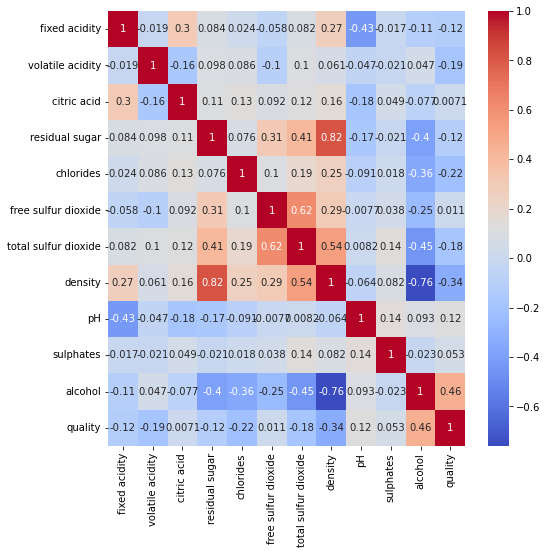

In [16]:
#Checking correlations of variable
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

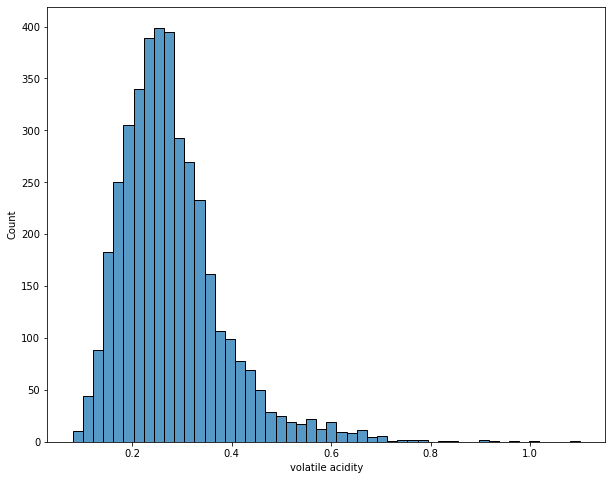

In [56]:
#Distribution of volatile acidity
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='volatile acidity',
             palette=palette, bins=50)
plt.show()

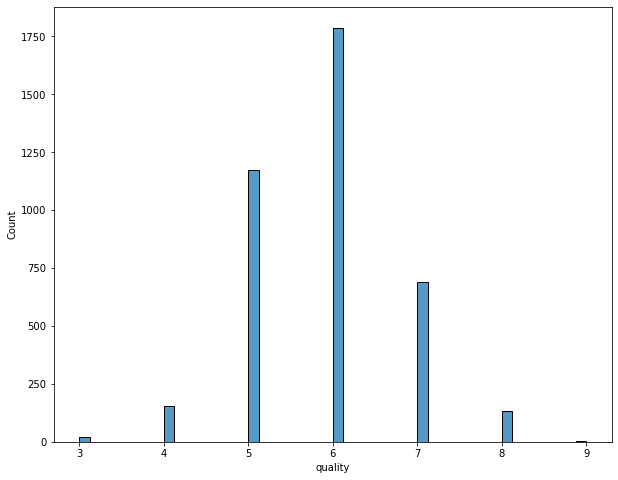

In [55]:
#Distribution of wine quality
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='quality',palette=palette)
plt.show()

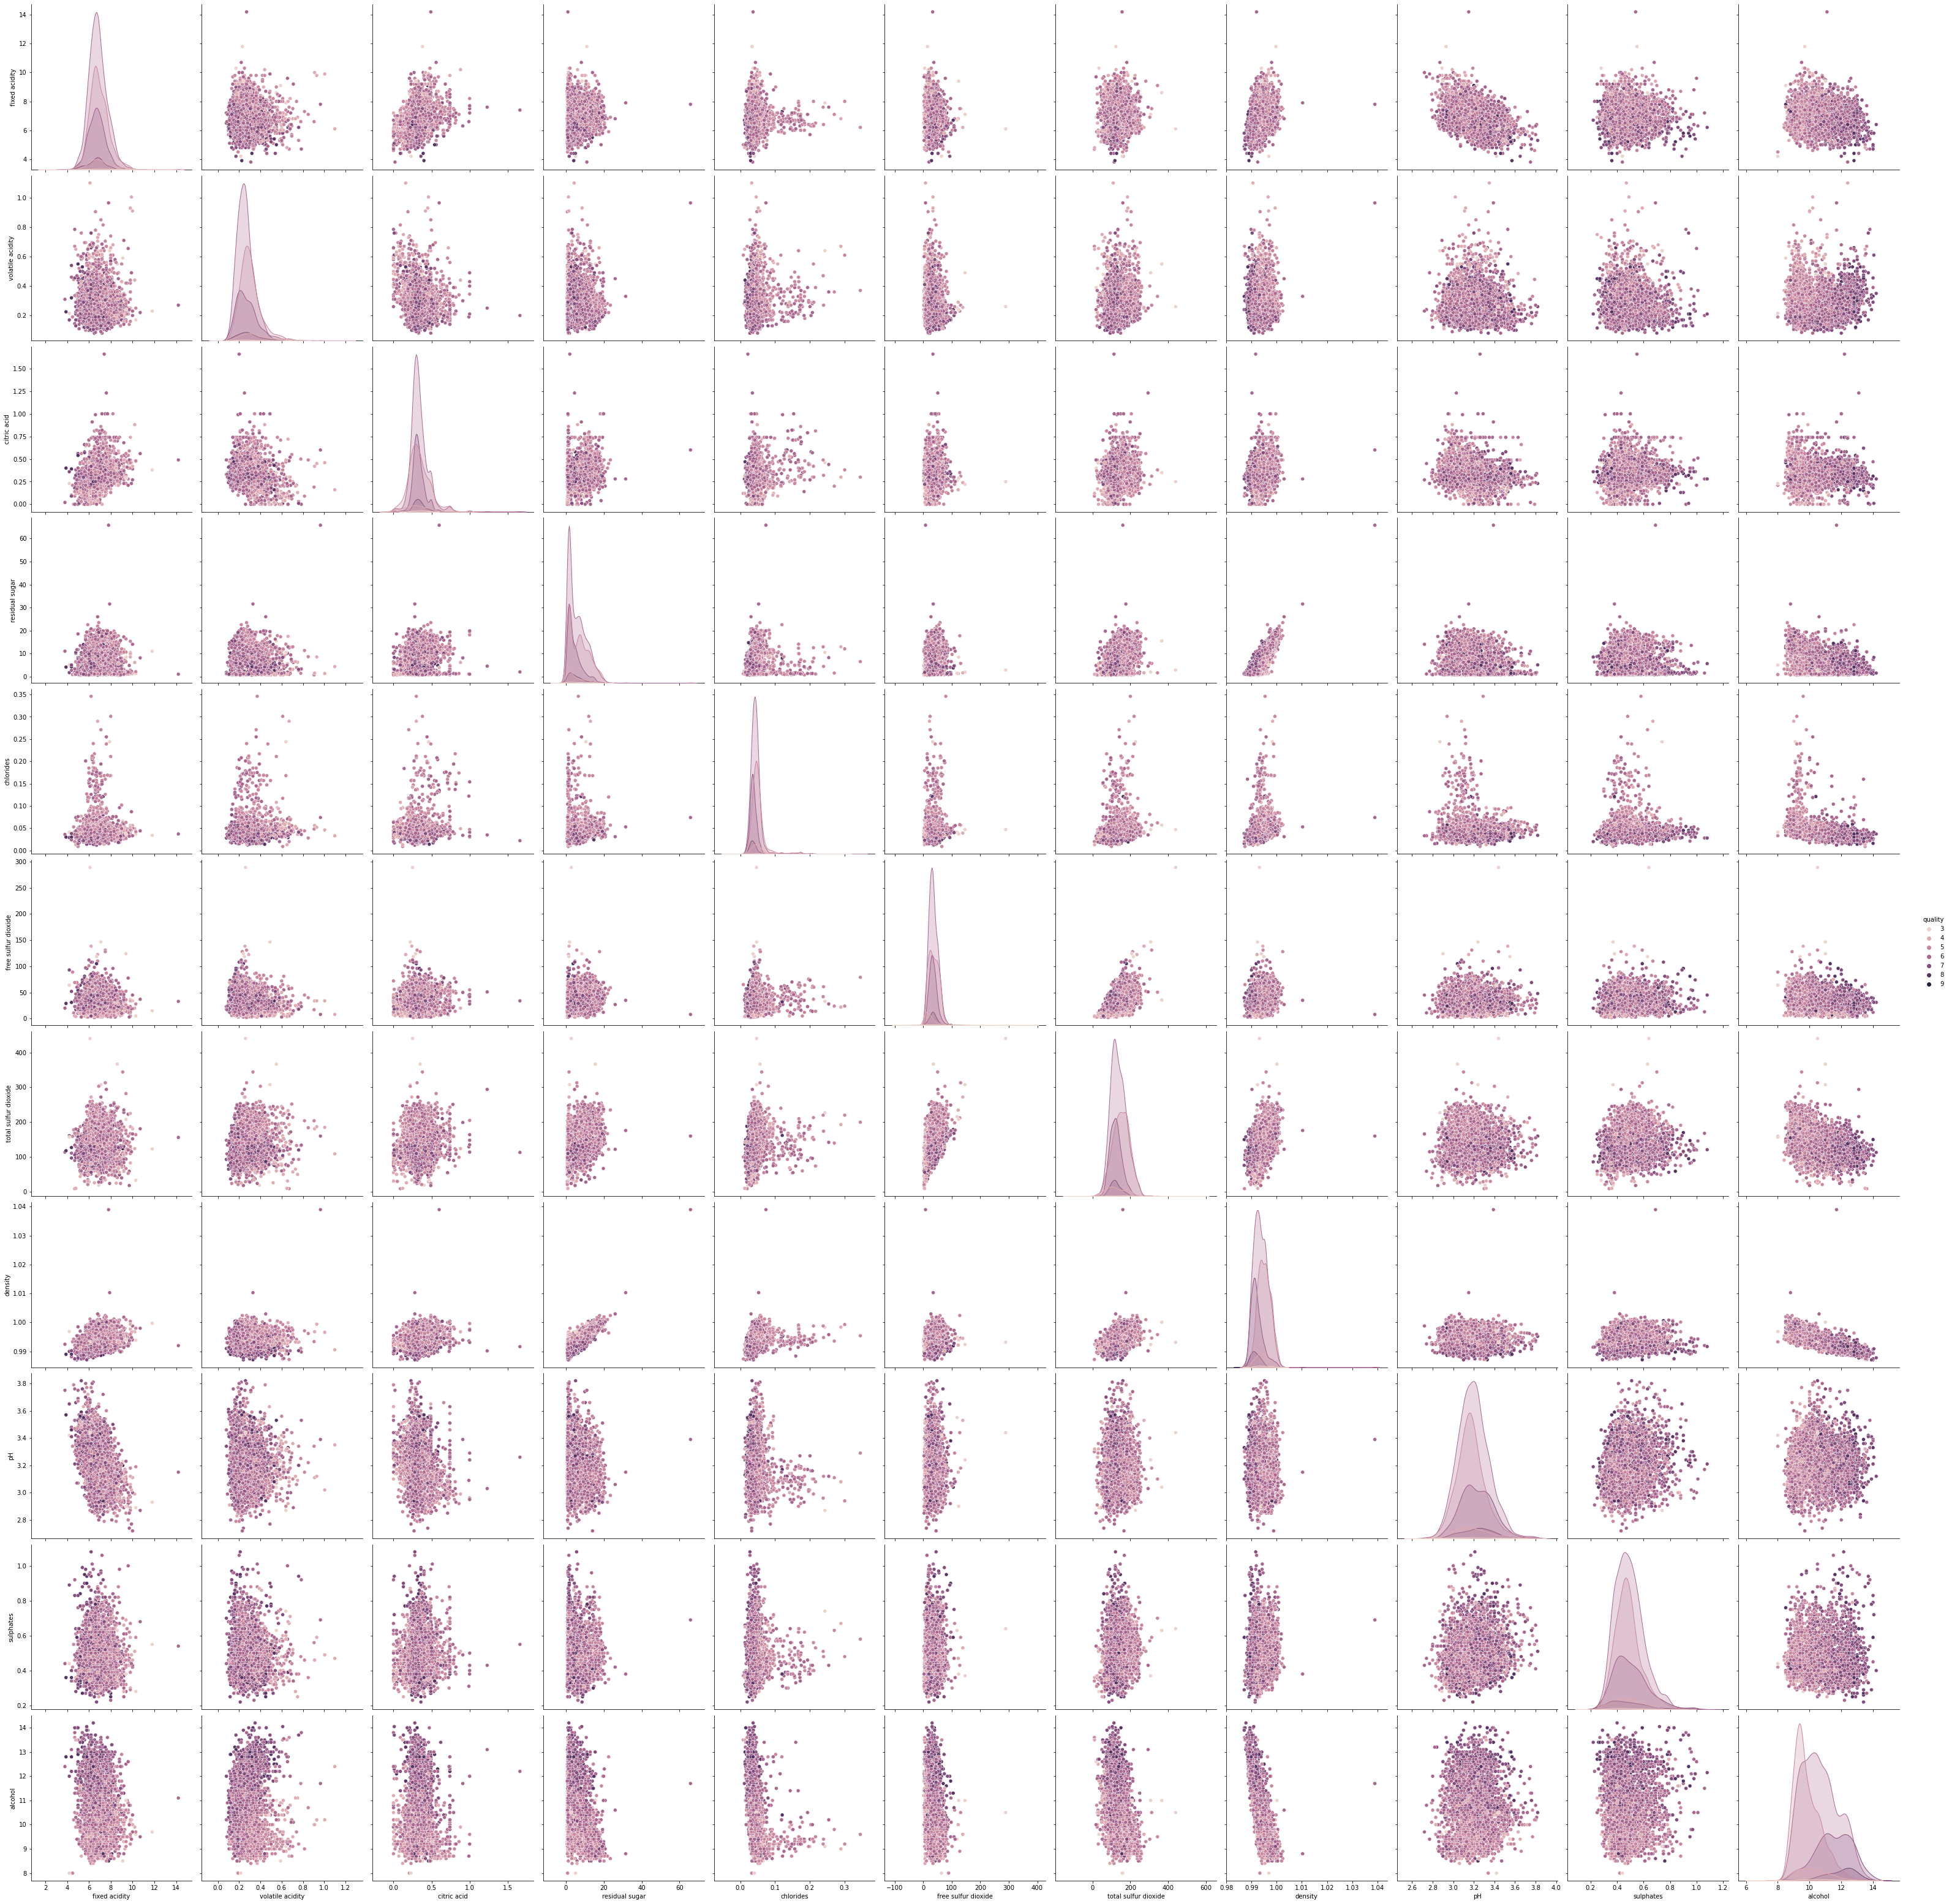

In [24]:
sns.pairplot(df, hue='quality', height=4)
plt.show()

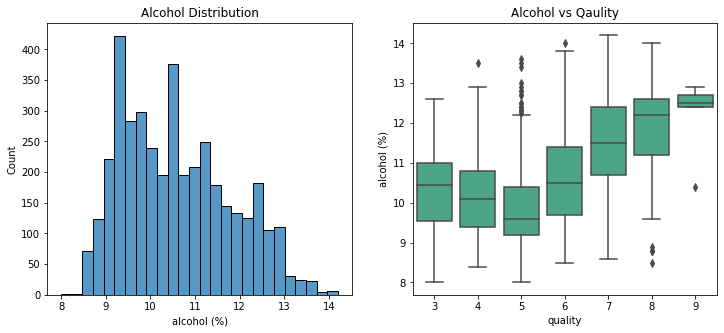

In [43]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='alcohol', ax=axes[0])
sns.boxplot(data=df, x='quality', y='alcohol', color=color_, ax=axes[1])
axes[0].set_title('Alcohol Distribution')
axes[0].set_xlabel('alcohol (%)')
axes[1].set_title('Alcohol vs Qaulity')
axes[1].set_ylabel('alcohol (%)')
plt.show()

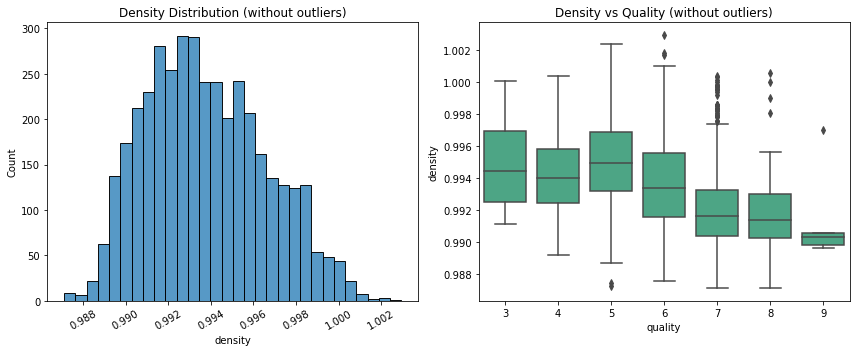

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
filtered = df.query("density < 1.01")
sns.histplot(data=filtered, x='density', bins=30, ax=axes[0])
sns.boxplot(data=filtered, x='quality', y='density', color=color_, ax=axes[1])
axes[0].set_title('Density Distribution (without outliers)')
axes[0].tick_params(axis='x', labelrotation=30)
axes[1].set_title('Density vs Quality (without outliers)')
plt.tight_layout()
plt.show()

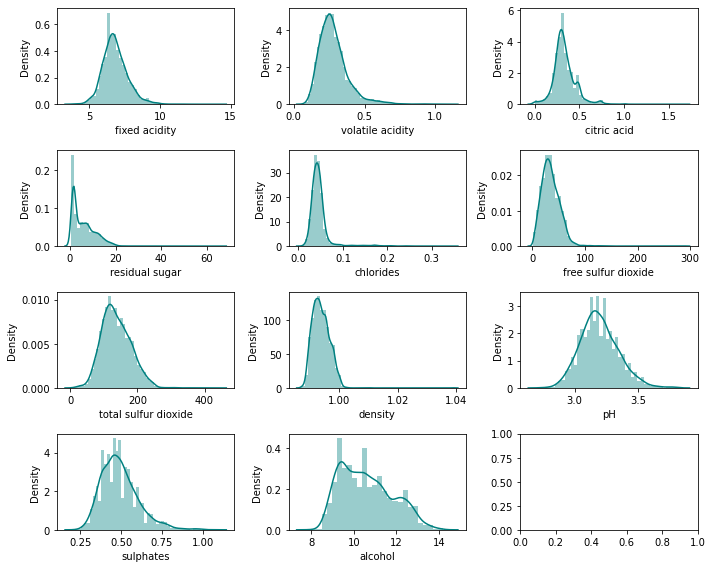

In [59]:
fig, axes = plt.subplots(4,3,figsize=(10,8))

i=0
for row in range(4):
    for col in range(3):
        if i<11:
            sns.distplot(df[df.columns[:-1][i]], ax=axes[row][col], color='teal')
            i+=1

fig.tight_layout()

In [27]:
df.describe().transpose()

count        mean        std      min        25%  \
fixed acidity         3961.0    6.839346   0.866860  3.80000    6.30000   
volatile acidity      3961.0    0.280538   0.103437  0.08000    0.21000   
citric acid           3961.0    0.334332   0.122446  0.00000    0.27000   
residual sugar        3961.0    5.914819   4.861646  0.60000    1.60000   
chlorides             3961.0    0.045905   0.023103  0.00900    0.03500   
free sulfur dioxide   3961.0   34.889169  17.210021  2.00000   23.00000   
total sulfur dioxide  3961.0  137.193512  43.129065  9.00000  106.00000   
density               3961.0    0.993790   0.002905  0.98711    0.99162   
pH                    3961.0    3.195458   0.151546  2.72000    3.09000   
sulphates             3961.0    0.490351   0.113523  0.22000    0.41000   
alcohol               3961.0   10.589358   1.217076  8.00000    9.50000   
quality               3961.0    5.854835   0.890683  3.00000    5.00000   

                           50%        75%        max  
fixed acidity           6.8000    7.30000   14.20000  
volatile acidity        0.2600    0.33000    1.10000  
citric acid             0.3200    0.39000    1.66000  
residual sugar          4.7000    8.90000   65.80000  
chlorides               0.0420    0.05000    0.34600  
free sulfur dioxide    33.0000   45.00000  289.00000  
total sulfur dioxide  133.0000  166.00000  440.00000  
density                 0.9935    0.99571    1.03898  
pH                      3.1800    3.29000    3.82000  
sulphates               0.4800    0.55000    1.08000  
alcohol                10.4000   11.40000   14.20000  
quality                 6.0000    6.00000    9.00000

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [44]:
df.groupby('alcohol')['quality'].value_counts().sort_values(ascending=False)[:5]

alcohol  quality
9.4      5          94
9.5      5          92
9.2      5          74
11.0     6          73
10.5     6          70
Name: quality, dtype: int64

In [28]:
'''
There exist both descrete and continuous variables in the dataset.
From the data visualization, we've seen the existence of outliers in the dataset
'''

"\nThere exist both descrete and continuous variables in the dataset.\nFrom the data visualization, we've seen the existence of outliers in the dataset\n"

In [1]:
#Associated task; classification 

In [61]:
#Preprocessing.
#Remove the outliers
df1 = df.copy()

for i in df1.columns[:-1]:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3-Q1
    df1 = df1[df1[i] <= Q3+(1.5*IQR)]
    df1 = df1[df1[i] >= Q1-(1.5*IQR)]

    df1 = df1.reset_index(drop=True)



In [63]:
#drop  "residual sugar" since it has a close correlation with density
#Feature
X = df1.drop(["quality", "residual sugar"], axis=1)
#Target
y = df1["quality"]

In [65]:
#Feature columns
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [68]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.65443698,  0.45958446,  0.17786343, ...,  0.73374697,
         0.08129418, -0.99351265],
       [ 1.73430973,  0.19799022,  0.88004809, ...,  0.44644747,
        -0.42415452, -0.48858179],
       [ 0.53993637, -0.45599539, -0.05619813, ..., -0.05632665,
        -0.82851348, -0.65689208],
       ...,
       [-0.38902068, -0.32519827, -1.57759822, ..., -1.49282414,
        -0.22197504, -1.07766779],
       [-1.71610219,  0.32878734, -0.29025968, ...,  1.02104647,
        -1.03069296,  1.78360707],
       [-1.05256144, -0.71758964,  0.64598653, ...,  0.44644747,
        -1.63723139,  0.94205564]])

In [70]:
y = y.to_numpy()
y.shape

(3207,)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(2565, 642, 2565, 642)

In [76]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), 
          GradientBoostingClassifier(), KNeighborsClassifier()
          ]
accuracy = {}

for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    accuracy[str(model)] = round(accuracy_score(y_test, y_preds), 4)

accuracy

{'DecisionTreeClassifier()': 0.4533,
 'RandomForestClassifier()': 0.5078,
 'GradientBoostingClassifier()': 0.4891,
 'KNeighborsClassifier()': 0.4907}

In [93]:
score = cross_val_score(RandomForestClassifier(random_state=42),
                         X, y, cv=9, scoring='accuracy')

print(f'score for each fold:{score}')
print(f'average score: {"{:.3f}".format(score.mean())}')

score for each fold:[0.53221289 0.50980392 0.49019608 0.51966292 0.58707865 0.5252809
 0.47191011 0.58707865 0.54494382]
average score: 0.530


In [100]:
model = RandomForestClassifier(random_state=42)
space = {}
space['n_estimators'] = [10, 100,500]
space['max_features'] = [2, 4, 6]

search = GridSearchCV(model, space, scoring='accuracy', cv =9, refit=True)
result = search.fit(X_train, y_train)

reslt = result.best_estimator_

In [101]:
reslt

RandomForestClassifier(max_features=2, n_estimators=500, random_state=42)

In [102]:
y_pred_test = result.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
round(accuracy, 4)

0.5249